<a href="https://colab.research.google.com/github/saadan1234/100DaysOfDeepLearning/blob/main/PerceptronLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook provides basic intuitionof how the classification algortihms learn to predict the classification margin and update its values.

# Data Creation

In [452]:
from sklearn.datasets import make_classification
import numpy as np

# x, y = make_classification(n_samples=100, n_features=2,n_informative=1,n_redundant=0, n_classes = 2, n_clusters_per_class=1, random_state = 42,hypercube=False,class_sep=15)
x, y = make_classification(n_samples=200, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [453]:
import matplotlib.pyplot as plt

# Visualization

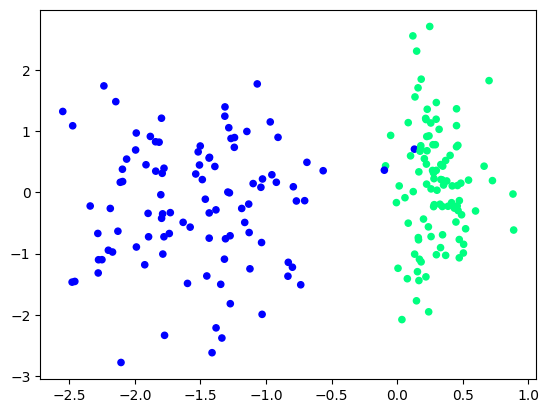

In [454]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=20)

# Activation Function

In [455]:
def step(z):
    return 1 if z>0 else 0

# Learning Rule

In [456]:
# # Update rule irrespective of loss for general classification

# def classify(x, y):
#   x = np.insert(x,2,1,axis=1)
#   weights = np.ones(x.shape[1])
#   alpha = 0.1
#   for i in range(1000):
#     point = np.random.randint(0,200)
#     pred = step(np.dot(x[point],weights))
#     weights = weights + alpha * (y[point] - pred) * x[point]
#   return weights[2],weights[0:2]

In [457]:
print(x.shape)

(200, 2)


In [458]:
print(x.shape[0])
print(x.shape[1])
print(y[2])

200
2
1


In [484]:
# # # Update rule based on loss function (Hinge Loss)

def classify(x, y):
  w1=w2=b=1
  alpha = 0.1
  for j in range(1000):
    for i in range(x.shape[0]):
      z = w1*x[i][0] + w2*x[i][1] + b
      if (z*y[i]<1):
        w1 +=  alpha*y[i]*x[i][0]
        w2 +=  alpha*y[i]*x[i][1]
        b +=  alpha*y[i]
  return b,[w1,w2]

In [485]:
bias,weights = classify(x,y)
print(bias)
print(weights)

1.5000000000000004
[1.0619462567125233, 0.08271406159103756]


# Classification Line

In [486]:
m = -(weights[0]/weights[1])
b = -(bias/weights[1])

In [487]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

Visualization

(-3.0, 2.0)

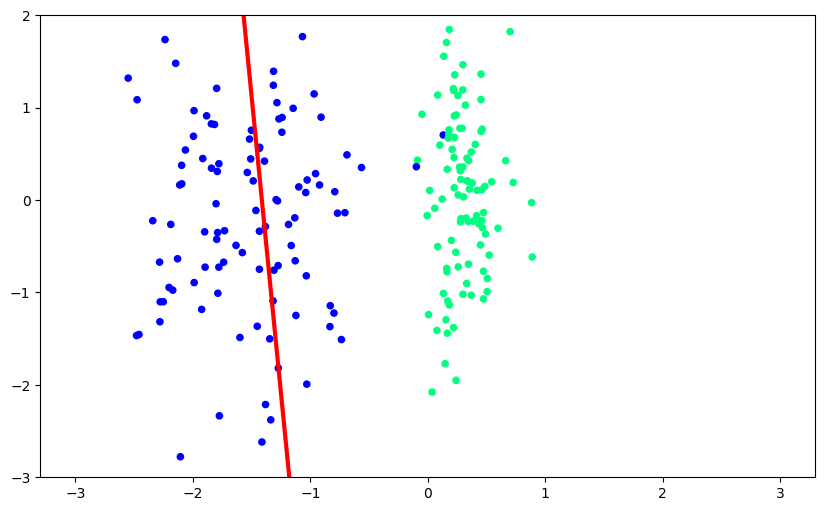

In [488]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=20)
plt.ylim(-3,2)

# Conclusion

As the code is not perfectly linearly seperable because of 3 blue points running code multiple times may provide different but similar lines.

Also to note that the loss function weight works worse then the update rule without loss